In [1]:
import pandas as pd
import os
import glob
% matplotlib inline

# Import data

In [3]:
path = '/Users/thomas/Udacity/8_Data_visualization/Project/'
all_files = glob.glob(os.path.join(path, "*.bz2"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

/Users/thomas/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  """


In [4]:
df.rename(columns={"DayofMonth": "Day"}, inplace=True)
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [5]:
df.columns.values

array(['Year', 'Month', 'Day', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Date'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123534969 entries, 0 to 123534968
Data columns (total 30 columns):
Year                 int64
Month                int64
Day                  int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: datetime64[ns](1), fl

# Aggregation by Date

In [8]:
df_agg = df[['Date', 'ArrDelay', 'Cancelled']]\
    .groupby(['Date'])\
    .agg('mean')\
    .reset_index()

In [9]:
df_agg['ArrDelay'] = df_agg['ArrDelay'].apply(lambda x: 0 if x <= 0 else x)
df_agg.fillna(0, inplace=True)

In [10]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7763 entries, 0 to 7762
Data columns (total 3 columns):
Date         7763 non-null datetime64[ns]
ArrDelay     7763 non-null float64
Cancelled    7763 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 182.0 KB


In [14]:
df_agg.ArrDelay.describe()

count    7763.000000
mean        7.160230
std         6.701291
min         0.000000
25%         2.166425
50%         5.562487
75%        10.194083
max        67.904927
Name: ArrDelay, dtype: float64

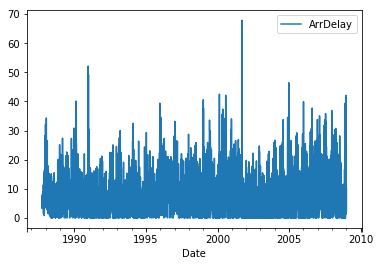

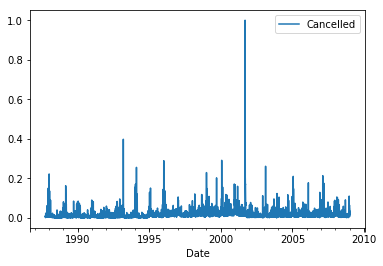

In [11]:
df_agg.plot(kind='line', x = 'Date', y='ArrDelay')
df_agg.plot(kind='line', x = 'Date', y='Cancelled')

In [13]:
df_agg.to_csv('US_flight_delays_1987-2008.csv', index=False)

# Aggregation by Date and Origin

In [178]:
aeroport_list = df.groupby('Origin').size().sort_values(ascending=False).head(5).index

In [179]:
df_filter = df[df['Origin'].isin(aeroport_list)]

In [180]:
df_agg = df_filter[['Date', 'DepDelay', 'Cancelled', 'UniqueCarrier', 'Origin']]\
    .groupby(['Date', 'Origin'])\
    .agg('mean')\
    .reset_index()

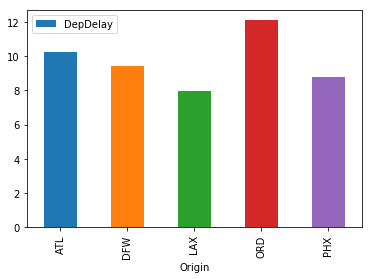

In [181]:
df_agg.groupby('Origin').agg('mean').reset_index().plot(kind='bar', x='Origin', y='DepDelay')

# Aggregation by Date and Carrier

In [182]:
carrier_list = df.groupby('UniqueCarrier').size().sort_values(ascending=False).head(5).index

In [183]:
df_filter = df[df['UniqueCarrier'].isin(carrier_list)]

In [184]:
df_agg = df_filter[['Date', 'ArrDelay', 'Cancelled', 'UniqueCarrier', 'Origin']]\
    .groupby(['Date', 'UniqueCarrier'])\
    .agg('mean')\
    .reset_index()

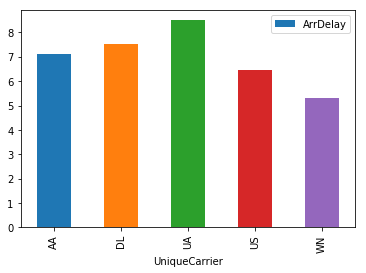

In [185]:
df_agg.groupby('UniqueCarrier').agg('mean').reset_index().plot(kind='bar', x='UniqueCarrier', y='ArrDelay')